In [4]:
from arcgis import GIS
gis = GIS('pro')

* In AGOL, select the Content tab, then select Living Atlas.
* Search for `NHD`
* Select [USA National Hydrography Dataset Plus](http://dukeuniv.maps.arcgis.com/home/item.html?id=5600cf6b463043ec97b764fb258997be)
* Note the item id in the web address: `5600cf6b463043ec97b764fb258997be`

<Item title:"USA National Hydrography Dataset Plus Version 2.1 - Seamless" type:Map Image Layer owner:esri>
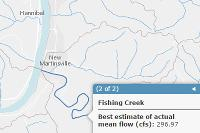

In [5]:
itemID = '5600cf6b463043ec97b764fb258997be'
theItem = gis.content.get(itemID)
theItem

In [6]:
theLayers = theItem.layers
theLayers

[<FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/0">,
 <FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/1">,
 <FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/2">,
 <FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/3">,
 <FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/4">,
 <FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/5">]

In [7]:
for theLayer in theLayers:
    print(theLayer.properties.name)

Sinks
Watershed Boundary - Hydrologic Unit 12
Catchment Boundary
Waterbodies - Feature Type
Areas - Feature Type
Streams - Best Estimate of Actual Mean Annual Flow (cfs)


In [8]:
#Get the Streams layer
stream_layer = theLayers[5]
stream_layer

<FeatureLayer url:"https://landscape1.arcgis.com/arcgis/rest/services/USA_NHDPlusV2_1_Flat/MapServer/5">

In [9]:
#Reveal the capabilities associated with this layer
stream_layer.properties.capabilities

'Map,Query,Data'

In [22]:
#Reveal the fields
for f in stream_layer.properties.fields:
    print (f.name,end=', ')

objectid, comid, resolution, gnis_id, gnis_name, lengthkm, reachcode, flowdir, wbareacomi, ftype, fcode, streamleve, streamorde, streamcalc, fromnode, tonode, hydroseq, levelpathi, pathlength, terminalpa, arbolatesu, divergence, startflag, terminalfl, dnlevel, uplevelpat, uphydroseq, dnlevelpat, dnminorhyd, dndraincou, dnhydroseq, frommeas, tomeas, rtndiv, areasqkm, totdasqkm, divdasqkm, hwnodesqkm, maxelevsmo, minelevsmo, slope, elevfixed, hwtype, slopelenkm, qincr0001a, q0001c, v0001c, q0001e, v0001e, temp0001, ppt0001, pet0001, qg0001nav, gageadj, avgqadj, smgageid, smgageq, shape, 

In [11]:
#Query for a specific comid
query_results = stream_layer.query(where='objectid=100')
type(query_results)

arcgis.features.feature.FeatureSet

In [15]:
features = query_results.features
for feat in features:
    print (feat.attributes['reachcode'])

01010002000074


In [28]:
query_results.sdf

,SHAPE,arbolatesu,areasqkm,avgqadj,comid,divdasqkm,divergence,dndraincou,dnhydroseq,dnlevel,...,terminalfl,terminalpa,tomeas,tonode,totdasqkm,uphydroseq,uplevelpat,v0001c,v0001e,wbareacomi
0,"{""paths"": [[[-7729120.3355, 5856275.5458], [-7...",39.697,2.6838,0,719942,74.2221,0,1,150020711,6,...,0,150002518,100,150001443,74.2221,150024742,150019243,1.2099,1.2099,0


https://developers.arcgis.com/python/guide/analyzing-patterns-in-feature-data/

In [13]:
m = gis.map()
m.add_layer(query_results)
m

MapView(layout=Layout(height='400px', width='100%'))